In [6]:
import pandas as pd

df = pd.read_csv("listings.csv")

columns = ["price", "review_scores_rating", "review_scores_value", "number_of_reviews", "beds"]
df = df[columns].copy()
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)
df.dropna(inplace=True)

#特征选择与建模
from sklearn.model_selection import train_test_split   # Split training/testing sets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

X = df[["review_scores_rating", "review_scores_value", "number_of_reviews", "beds"]]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

coefficients = dict(zip(X.columns, model.coef_))
intercept = model.intercept_

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)
print("Coefficients:", coefficients)
print("Intercept:", intercept)



RMSE: 377.60148436007654
MAE: 73.16940614110575
R²: 0.03881317222417435
Coefficients: {'review_scores_rating': 59.673169102749526, 'review_scores_value': -34.929779591058875, 'number_of_reviews': -0.15604699349881201, 'beds': 32.91496275890635}
Intercept: -51.83328005150304


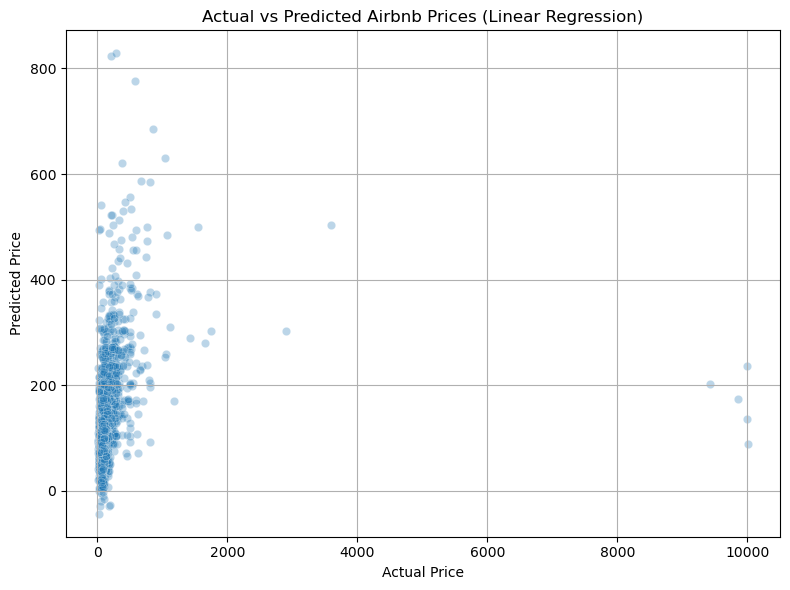

In [7]:
#预测 vs 实际
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Airbnb Prices (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#

RMSE: 78.813635412575
MAE: 46.2190426786781
R²: 0.31799095323308735
Coefficients: {'review_scores_rating': 59.673169102749526, 'review_scores_value': -34.929779591058875, 'number_of_reviews': -0.15604699349881201, 'beds': 32.91496275890635}
Intercept: -51.83328005150304


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


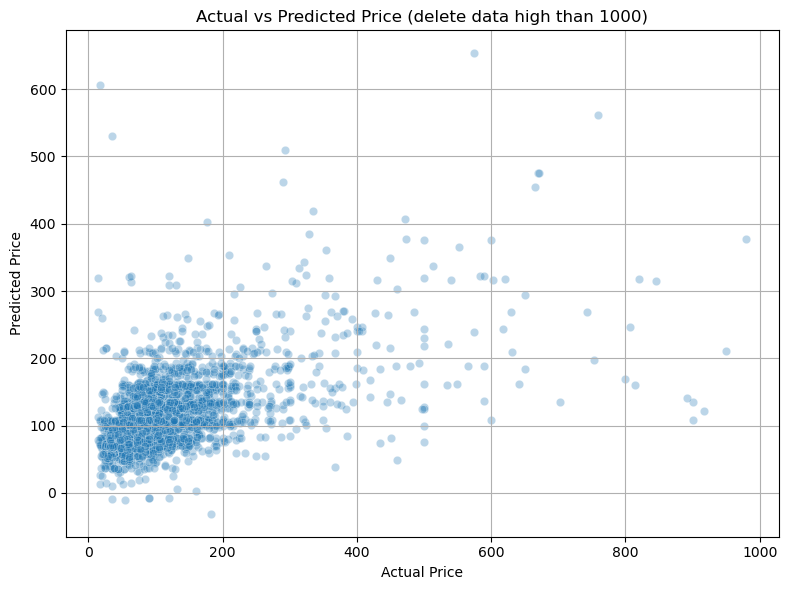

In [13]:
df = df[df["price"] <= 1000]

# Features and target variables
X = df[["review_scores_rating", "review_scores_value", "number_of_reviews", "beds"]]
y = df["price"]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modul train 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Model prediction and evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("Coefficients:", coefficients)
print("Intercept:", intercept)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (delete data high than 1000)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
pip install torch pandas matplotlib scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 5.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 10.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 28.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 12.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 7.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 16.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 17.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 16.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━

RMSE: 82.66083719316497
MAE: 47.371557264036944
R²: 0.29624134190704177


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


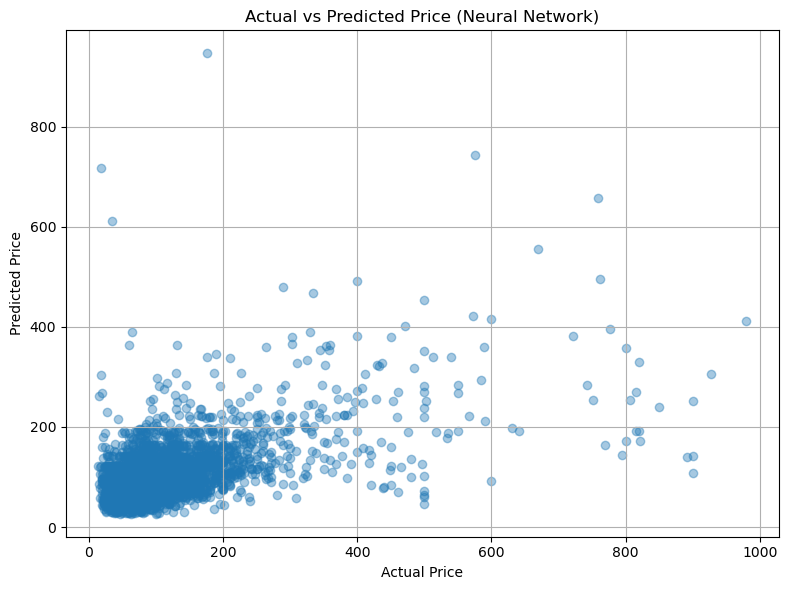

In [7]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# 1. Daten laden und übermäßig große Daten bereinigen
df = pd.read_csv("listings.csv")
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)
df = df[["price", "review_scores_rating", "review_scores_value", "number_of_reviews", "beds"]]
df.dropna(inplace=True)
df = df[df["price"] < 1000]  # entfernen

# 2. Merkmalsauswahl und Segmentierung
X = df.drop("price", axis=1).values
y = df["price"].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# 3. Bauen Sie ein neuronales Netzwerk auf
class AirbnbNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(4, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.net(x)

model = AirbnbNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Modelltraining
for epoch in range(300):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    loss.backward()
    optimizer.step()

# 5. Vorhersage und Bewertung
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy().flatten()

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Neural Network)")
plt.grid(True)
plt.tight_layout()
plt.show()
